In [23]:
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
df=pd.read_csv('AB_NYC_2019.csv')

In [25]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
#Data Exploration 
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [27]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [24]:
df.shape

(48895, 16)

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.shape

(48895, 16)

In [28]:
#drop unnecessary columns
#df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
id                                38821 non-null int64
name                              38821 non-null object
host_id                           38821 non-null int64
host_name                         38821 non-null object
neighbourhood_group               38821 non-null object
neighbourhood                     38821 non-null object
latitude                          38821 non-null float64
longitude                         38821 non-null float64
room_type                         38821 non-null object
price                             38821 non-null int64
minimum_nights                    38821 non-null int64
number_of_reviews                 38821 non-null int64
last_review                       38821 non-null object
reviews_per_month                 38821 non-null float64
calculated_host_listings_count    38821 non-null int64
availability_365                  38821 non-null int64

In [29]:
df.neighbourhood.value_counts()

Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2204
Bushwick              1942
Hell's Kitchen        1528
                      ... 
New Dorp Beach           2
Castleton Corners        2
Richmondtown             1
Willowbrook              1
Rossville                1
Name: neighbourhood, Length: 218, dtype: int64

In [28]:
df.neighbourhood_group.value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [29]:
#Renaming neighbourhood_group for readability
df.rename(columns={'neighbourhood_group':'borough'})
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [30]:
df.reviews_per_month.value_counts()

0.02     914
0.05     892
1.00     892
0.03     804
0.16     667
        ... 
10.23      1
8.94       1
6.04       1
9.21       1
10.67      1
Name: reviews_per_month, Length: 937, dtype: int64

In [7]:
df['reviews_per_month']=df['reviews_per_month'].apply(np.ceil)

In [32]:
df.reviews_per_month.value_counts()

1.0     22920
2.0      6142
3.0      4137
4.0      2638
5.0      1519
6.0       713
7.0       317
8.0       202
9.0        88
10.0       64
11.0       29
12.0       18
14.0       13
13.0        7
17.0        3
16.0        3
15.0        3
21.0        1
18.0        1
59.0        1
20.0        1
28.0        1
Name: reviews_per_month, dtype: int64

In [8]:
df['reviews_per_month'].dtype
#Replacing the null values in reviews_per_month to 0 and changing the datatype to int from float
df['reviews_per_month'].isnull().sum()
df['reviews_per_month']=df['reviews_per_month'].fillna(0)

In [9]:
df = df.astype({"reviews_per_month": int})

In [35]:
df['reviews_per_month'].isnull().sum()

0

In [37]:
#using foursquare API to get the Newyork city central data
#importing the required libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    nu

In [38]:
CLIENT_ID = 'NAO3G4GBFVG5VN0HXUGA2NIYXBQJHCKQXKHPISBKJUYIYA5O' # your Foursquare ID
CLIENT_SECRET = 'EDWKMJFWCPZISL5OHEMDS04C1SJTGIPG1AVMYXU25GWOAKFL' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NAO3G4GBFVG5VN0HXUGA2NIYXBQJHCKQXKHPISBKJUYIYA5O
CLIENT_SECRET:EDWKMJFWCPZISL5OHEMDS04C1SJTGIPG1AVMYXU25GWOAKFL


In [39]:
address = '102 North End Ave, New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7149555 -74.0153365


In [ ]:
lat1 = 40.7149555
lon1 = -74.0153365

In [10]:
df.set_index(['neighbourhood_group','neighbourhood','price','room_type'])
cdf = df[['neighbourhood_group','neighbourhood','price','room_type','number_of_reviews']]
cdf.head(9)

,neighbourhood_group,neighbourhood,price,room_type,number_of_reviews
0,Brooklyn,Kensington,149,Private room,9
1,Manhattan,Midtown,225,Entire home/apt,45
3,Brooklyn,Clinton Hill,89,Entire home/apt,270
4,Manhattan,East Harlem,80,Entire home/apt,9
5,Manhattan,Murray Hill,200,Entire home/apt,74
6,Brooklyn,Bedford-Stuyvesant,60,Private room,49
7,Manhattan,Hell's Kitchen,79,Private room,430
8,Manhattan,Upper West Side,79,Private room,118
9,Manhattan,Chinatown,150,Entire home/apt,160


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

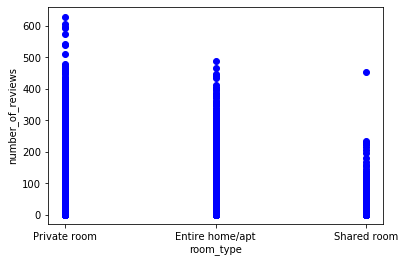

In [12]:


plt.scatter(cdf.room_type, cdf.number_of_reviews,  color='blue')
plt.xlabel("room_type")
plt.ylabel("number_of_reviews")
plt.show()

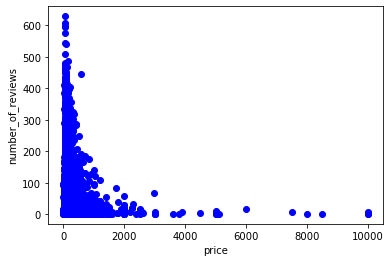

In [46]:
plt.scatter(cdf.price, cdf.number_of_reviews,  color='blue')
plt.xlabel("price")
plt.ylabel("number_of_reviews")
plt.show()

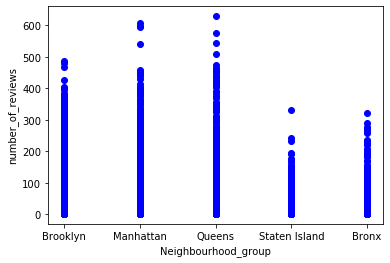

In [13]:
plt.scatter(cdf.neighbourhood_group, cdf.number_of_reviews,  color='blue')
plt.xlabel("Neighbourhood_group")
plt.ylabel("number_of_reviews")
plt.show()

In [14]:
df.neighbourhood_group.value_counts()

Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: neighbourhood_group, dtype: int64

In [49]:
df.price.max()

10000

In [50]:
df.price.min()

0

In [51]:
df.price.value_counts()

150     1596
100     1517
50      1188
60      1155
75      1095
        ... 
1002       1
442        1
474        1
805        1
820        1
Name: price, Length: 581, dtype: int64

In [52]:
price_df=df[df.price==0]

In [53]:
price_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,3,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,1,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,1,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,1,1,73


In [54]:
price_df.count()

id                                10
name                              10
host_id                           10
host_name                         10
neighbourhood_group               10
neighbourhood                     10
latitude                          10
longitude                         10
room_type                         10
price                             10
minimum_nights                    10
number_of_reviews                 10
last_review                       10
reviews_per_month                 10
calculated_host_listings_count    10
availability_365                  10
dtype: int64

In [55]:
price_df.shape

(10, 16)

In [ ]:
 #replacing null price with mean
    df['price']=df['price'].replace([0], 240)

In [ ]:
price_df=df[df.price==0]

In [56]:
price_df.shape

(10, 16)

In [63]:
df.room_type.value_counts()

Entire home/apt    20321
Private room       17654
Shared room          846
Name: room_type, dtype: int64

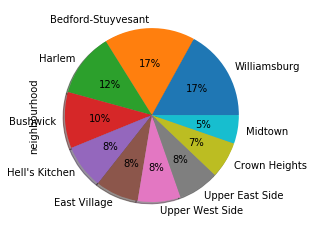

In [15]:
neighbourhood = df['neighbourhood']

neighbourhood_value_count = neighbourhood.value_counts().head(10).plot.pie(autopct='%1.0f%%', shadow=True)

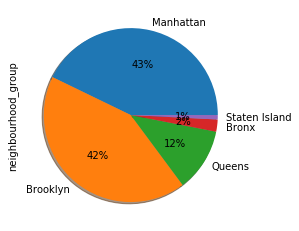

In [16]:
neighbourhood_group = df['neighbourhood_group']

neighbourhood__group_value_count = neighbourhood_group.value_counts().head(10).plot.pie(autopct='%1.0f%%', shadow=True)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

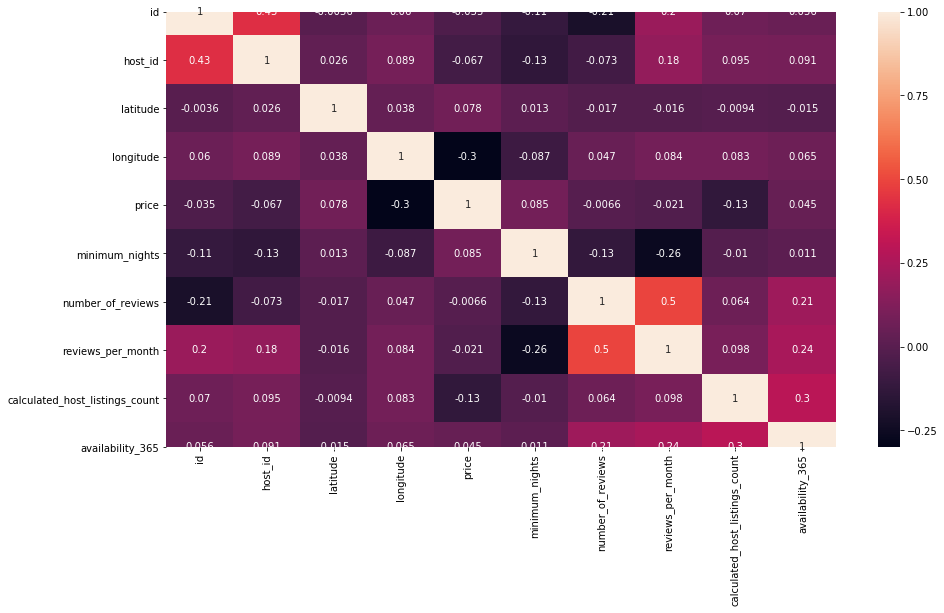

In [72]:
#Finding correlation for differennt variables 
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns

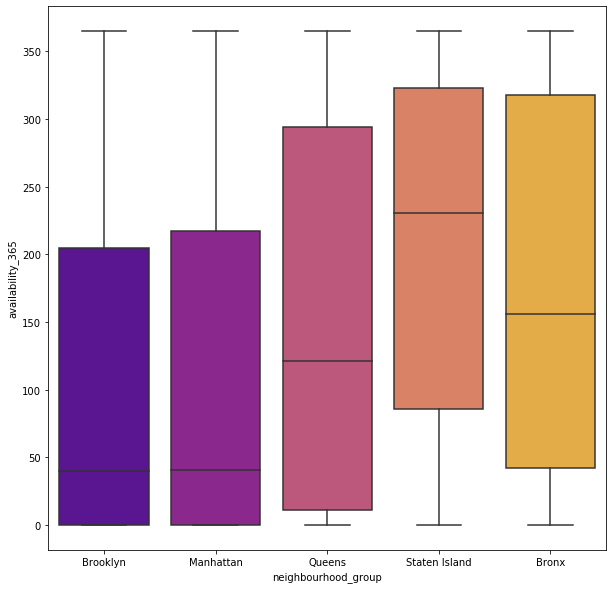

In [73]:
#Relationship between roomavailability and neighbourhood_group
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

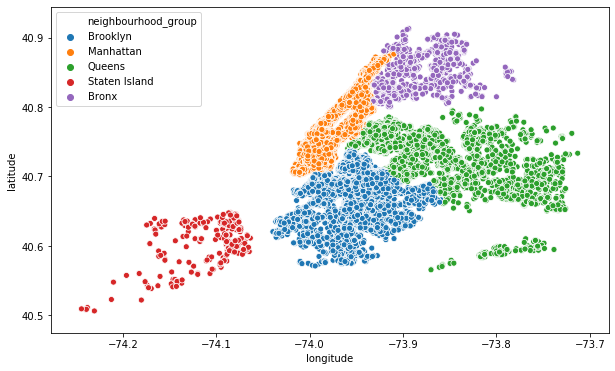

In [17]:
#map of neighbourhood _group
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

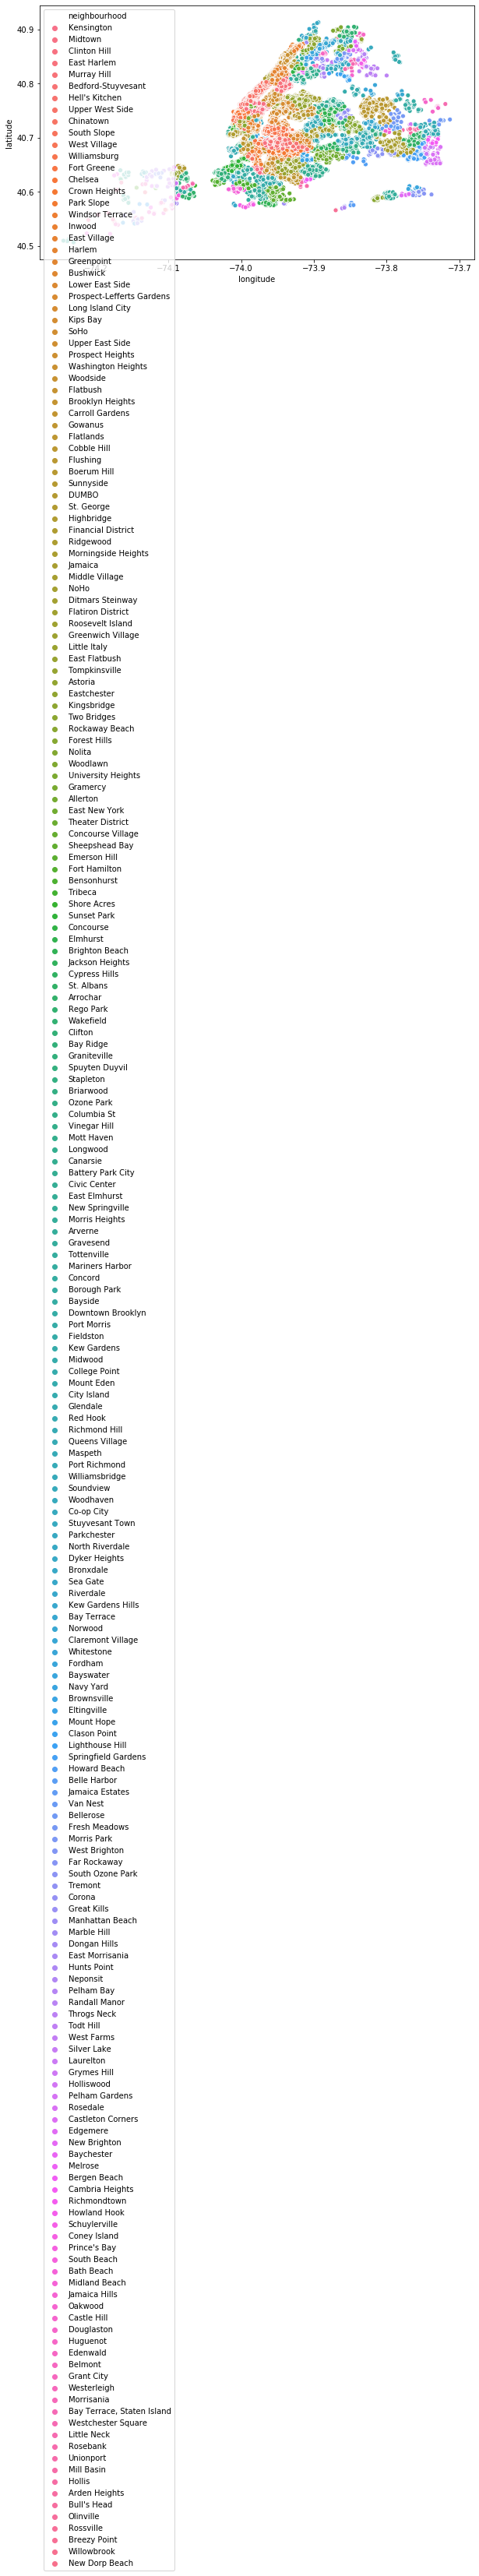

In [20]:
#Map of neighbourhood
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood)
plt.ioff()

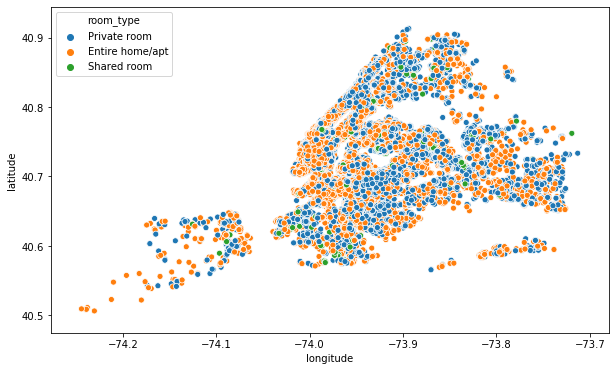

In [21]:
#MAp for roomtype
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.ioff()

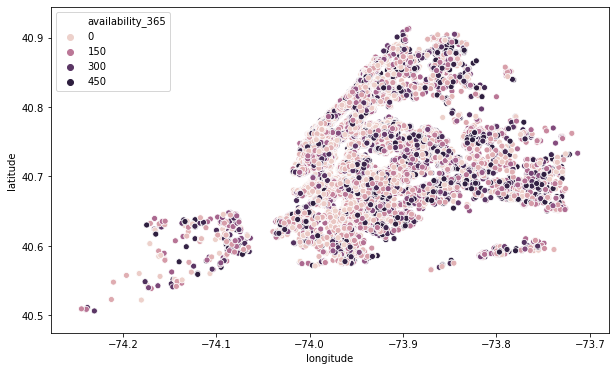

In [22]:
#MAp for availability
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.ioff()

In [74]:
#Regression Analysis 
#Drop columns that are not required
df.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month'], axis=1, inplace=True)
#examing the changes
df.head(5)


,id,name,host_name,neighbourhood_group,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Private room,149,1,2018-10-19,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Entire home/apt,225,1,2019-05-21,2,355
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Entire home/apt,89,1,2019-07-05,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,Entire home/apt,80,10,2018-11-19,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Entire home/apt,200,3,2019-06-22,1,129


In [75]:
#Encoding the values
#Encode the input Variables
def Encode(df):
    for column in df.columns[df.columns.isin(['neighbourhood_group', 'room_type'])]:
        df[column] = df[column].factorize()[0]
    return df

airbnb_en = Encode(df.copy())

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'room_type', 'price',
       'minimum_nights', 'last_review', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

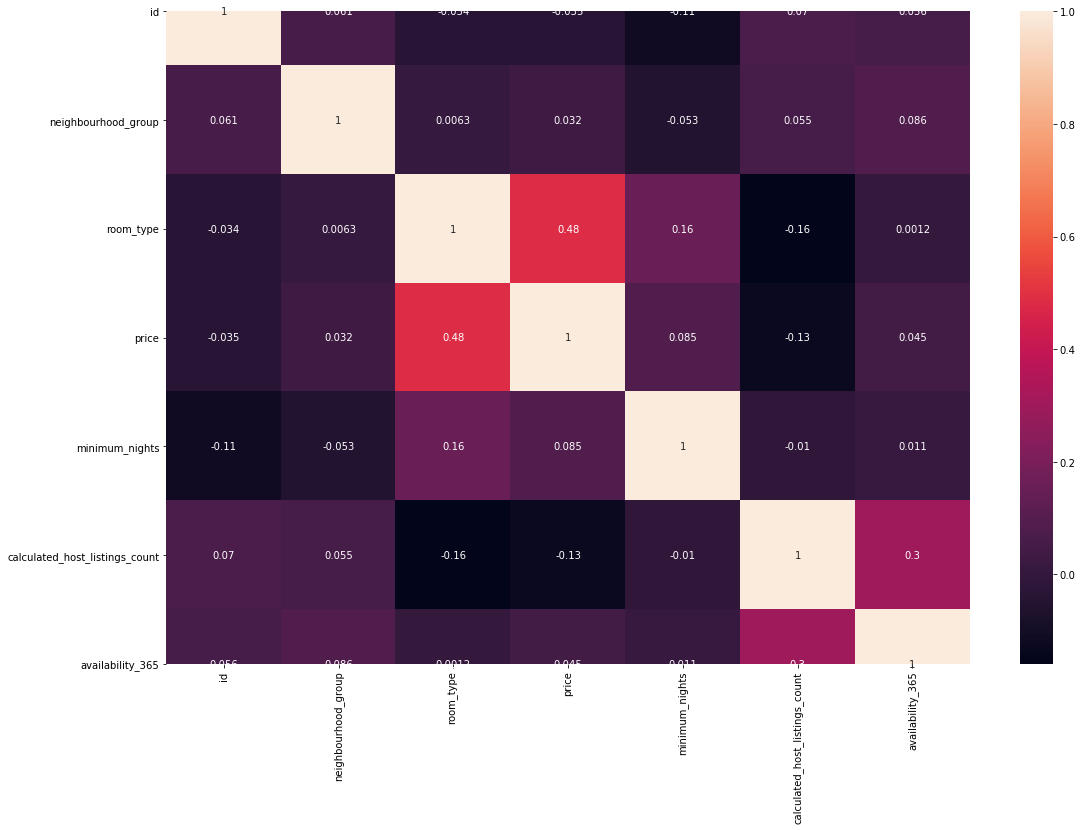

In [76]:
#Get Correlation between different variables
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [87]:
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,3,4,5]]
y = airbnb_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

17716    250
21864    200
9681      88
35334     60
21354     45
Name: price, dtype: int64

In [88]:
x_train.shape


(34938, 4)

In [89]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0

In [90]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9947725532635062